**En estos ejercicios hay que determinar las probabilidades pedidas mediante simulación, pero también es interesante resolver el ejercicio teóricamente y comparar el resultado.**

#### Ejercicio 1

Supongamos una familia con dos hijos y uno de ellos es un chico. Calcula la probabilidad de que los dos hijos sean chicos.

Vamos primero a definir ciertas funciones que nos servirán a lo largo de todos los ejercicios

In [2]:
def moneda():
    x = random()
    if x <= (1/2):
        return 0
    else:
        return 1

In [71]:
def moneda_trucada(prob0):
    x = random()
    if x <= prob0:
        return 0
    else:
        return 1

In [3]:
def probEj1(N):
    i=0
    cont=0
    while(1):
        if i==N:
            break
            
        a = moneda()
        b = moneda()
        if(a==1 or b==1): #al menos uno es chico
            i += 1
            if(a==1 and b==1): #los dos son chicos
                cont += 1
    return (cont/N).n()

In [8]:
Q = [probEj1(10*k) for k in xsrange(100, 1000, 100)]
print Q
print (sum(Q)/len(Q)).n()

[0.333000000000000, 0.333000000000000, 0.323333333333333, 0.327000000000000, 0.341400000000000, 0.335000000000000, 0.326142857142857, 0.329625000000000, 0.331000000000000]
0.331055687830688


Podemos ver que experimentalmente hemos obtenido de media un 33% de probabilidad. Vamos a comparar esto con lo teórico.
El cálculo teórico se basa en la Regla de Bayes: $$P(2 chicos | al menos 1 chico) = \frac{P(al menos 1 chico | 2 chicos) * P(2 chicos)}{P(al menos 1 chico)}$$

Sabemos que $P(al menos 1 chico | 2 chicos) = 1$ y que $P(2 chicos) = \frac{1}{2} * \frac{1}{2} = \frac{1}{4}$. Por último podemos calcular el denominador de la siguiente forma: $$P(al menos 1 chico) = \frac{1}{2}*\frac{1}{2} + 2*\frac{1}{4} = \frac{3}{4}$$

Por lo tanto: $$P(2 chicos | al menos 1 chico) = \frac{1 * \frac{1}{4}}{\frac{3}{4}} = \frac{1}{3}$$
Lo que coincide con los cálculos experimentales

#### Ejercicio 2

Supongamos una familia con dos hijos y el menor es una chica. Calcula la probabilidad de que los dos hijos sean chicas.

In [12]:
def probEj2(N):
    i=0
    cont=0
    while(1):
        if i==N:
            break
            
        menor = moneda()
        mayor = moneda()
        if(menor==1): #la menor es una chica
            i += 1 #el contador i nos permite solo contar los casos en la que la menor es chica (probabilidad condicionada)
            if(menor==1 and mayor==1): #las dos son chicas
                cont += 1
    return (cont/N).n()

In [15]:
W = [probEj2(10*k) for k in xsrange(100, 1000, 100)]
print W
print (sum(W)/len(W)).n()

[0.497000000000000, 0.521500000000000, 0.508000000000000, 0.490500000000000, 0.508600000000000, 0.489333333333333, 0.503142857142857, 0.495250000000000, 0.509666666666667]
0.502554761904762


Podemos ver que experimentalmente hemos obtenido de media un 50% de probabilidad. Vamos a comparar esto con lo teórico.
El cálculo teórico se basa en la Regla de Bayes: $$P(2 chicas | la Menor Chica) = \frac{P(la Menor Chica | 2 chicas) * P(2 chicas)}{P(la Menor Chica)}$$

Sabemos que $P(la Menor Chica | 2 chicas) = 1$, que $P(2 chicas) = \frac{1}{2} * \frac{1}{2} = \frac{1}{4}$ y que $P(la Menor Chica) = \frac{1}{2}$

Por lo tanto: $$P(2 chicas | la Menor Chica) = \frac{1 * \frac{1}{4}}{\frac{1}{2}} = \frac{1}{2}$$
Lo que coincide con los cálculos experimentales

#### Ejercicio 3

Un juego de azar, con dos jugadores $A$ y $B$, es *justo* si el premio de $A$ por la probabilidad de que $A$ gane es igual al premio de $B$ por la probabilidad de que $B$ gane. Si el juego es justo y se juega un número muy grande de veces es muy probable que los dos jugadores terminen con ganancia prácticamente cero. 

Supongamos la siguiente  apuesta de casino: se lanza una moneda $1000$ veces y si aparecen $10$ caras seguidas el jugador gana mientras que si no aparecen el casino gana. Si el casino pide que el jugador apueste $1$ euro para poder jugar, ¿cuál debe ser el premio para el jugador si el juego es justo?

*Los juegos de azar en los casinos nunca son justos,  ya que si el casino no gana grandes cantidades de dinero, que los jugadores pierden, cerraría.*



Lo primero, vamos a calcular experimentalmente la probabilidad de que gane el jugador:

In [21]:
def probJugador(nExperimentos):
    contVictorias = 0
    for k in xsrange(nExperimentos):
        cont = 0
        for i in xsrange(1000):
            a = moneda()
            if a==1:
                cont += 1
                if cont==10:
                    contVictorias += 1
                    break
            else:
                cont = 0
    return (contVictorias/nExperimentos).n()

In [26]:
print probJugador(10000)

0.390600000000000


Estos nos dice que la probabilidad del jugador es de aproximadamente de un $39\%$. Por consiguiente la probabilidad del casino es de un $1 - 0.39 = 0.61 = 61\%$

Conociendo esto, podemos utilizar la forma que define un juego justo: $$premio(A) * P(A) = premio(B) * P(B)$$
y despejar, en este caso, el premio del jugador para que el juego sea justo debe ser:
$$ premio(Jugador) = \frac{premio(Casino) * P(GanaCasino)}{P(GanaJugador)} = \frac{1 * 0.61}{0.39} = 1.564$$
    

#### Ejercicio 4

El jugador $A$ lanza un dado y el jugador $B$ dos dados. Si $A$ consigue un número mayor o igual al máximo obtenido por $B$ entonces gana $A$, y en caso contrario gana $B$. ¿Cuál es la probabilidad de que gane $B$?

Primero, vamos a definir una funcion dado() que simule el lanzamiento de un dado:

In [61]:
def dado():
    x = random()
    if x <= (1/6):
        return 1
    if x <= 2*(1/6):
        return 2
    if x <= 3*(1/6):
        return 3
    if x <= 4*(1/6):
        return 4
    if x <= 5*(1/6):
        return 5
    else:
        return 6

A continuación, calcularemos la probabilidad experimentalmente. Teóricamente no he podido averiguar como hacer un cálculo riguroso, pero si que es fácil ver que la probabilidad de B tiene que ser mayor que la de A, ya que B tiene dos lanzamientos para superar el dado de A, es decir, la probabilidad de B debería estar por encima del $50\%$.

In [63]:
def probEj4(nExperimentos):
    contVictoriasB = 0
    for k in xsrange(nExperimentos):
        a = dado()
        b1 = dado()
        b2 = dado()
        b = max(b1, b2)
        if b > a:
            contVictoriasB += 1
    return (contVictoriasB/nExperimentos).n()

In [65]:
probEj4(10**6)

0.579444000000000

Era más o menos lo que esperábamos

#### Ejercicio 5

Consideramos el siguiente 'juego': inicialmente hay $n$ jugadores  y en cada fase del juego cada jugador vivo elige **al azar** otro jugador vivo, distinto de sí mismo,  y lo mata.  El juego se repite hasta que queda un único jugador, *el elegido del destino*, o bien ninguno. En principio, es perfectamente posible que el juego se juegue una única vez.

1) Estima, con dos cifras decimales 'correctas',  la probabilidad de que, partiendo de  $n=100$ jugadores, haya un superviviente. Como se indicó en clase, entendemos que que son cifras decimales 'correctas' las que no cambian cuando se incrementa suficientemente el número $N$ de 'casos posibles'.

2) ¿Qué probabilidad tengo, si decido jugar con otros $99$ jugadores,  de ser yo el *elegido del destino*? Modifica el programa del apartado anterior para estimar la probabilidad y explica el resultado obtenido.

3) Ahora queremos estudiar la duración del juego. Para eso debemos  calcular *promedios* de la duración. Define una función *promedio(n,N)* que calcule el promedio y la desviación estándar de la duración con $n$ jugadores iniciales y $N$ repeticiones del juego. Evalúa *promedio(100,10^5)* y comenta los resultados obtenidos.

4) Finalmente, estudia la variación de los promedios al variar $n$ entre $10$ y $200$ saltando de $10$ en $10$. Realiza un gráfico de los resultados y analiza la dependencia funcional (el promedio como función de $n$). En este cuarto apartado probablemente tendrás que **elegir con más cuidado un $N$** (el número de repeticiones del juego utilizadas para calcular cada promedio) **adecuado**  dadas las capacidades bastante limitadas de las máquinas que usamos. 

In [1]:
def aleatorio(a,b):
    return a+(b-a)*random()

In [4]:
for k in xsrange(10):
    print aleatorio(-1, 1)

-0.625803714795
-0.761845216475
0.886867569927
0.367358226653
-0.01625891963
0.840922808747
0.604874980194
0.305400010971
-0.384928933508
-0.913871727358


In [73]:
def aleatorioEntero(a, b): #numero aleatorio entero entre a y b-1 (ambos incluidos)
    return floor(aleatorio(a, b))

In [14]:
for k in xsrange(10):
    print aleatorioEntero(0, 5)

2
0
2
1
0
0
4
0
3
2


In [59]:
def crearListaJuego(n): #los jugadores vivos se representan con un numero entre 1 y n (ambos incluidos)
    LPlay = []
    for i in xsrange(1, n+1):
        LPlay.append(i)
    return LPlay

In [60]:
def recalibrar(jugadores, elecciones):
    aux = set(elecciones)
    elecciones = list(aux)
    for eleccion in elecciones: #los jugadores muertos son etiquetados con un 0
        jugadores[eleccion] = 0
    Laux = []
    for jugador in jugadores: #se eliminan los muertos
        if jugador!=0:
            Laux.append(jugador)
    return Laux #se devuelven los vivos

In [64]:
def juego(n):
    jugadores = crearListaJuego(n)
    while(1):
        if(len(jugadores)==0 or len(jugadores)==1):
            break
            
        elecciones = []
        for jugador in jugadores: #cada jugador escoge un jugador
            a = jugadores.index(jugador)
            while(a == jugadores.index(jugador)):
                a = aleatorioEntero(0, len(jugadores))
            elecciones.append(a)
        jugadores = recalibrar(jugadores, elecciones)
    
    return jugadores  

In [66]:
for k in xsrange(1000):
    if(len(juego(100))==0):
        print true
        break

True


In [67]:
for k in xsrange(1000):
    if(len(juego(100))==1):
        print true
        break

True


In [68]:
for k in xsrange(1000):
    if(len(juego(100))==2):
        print true
        break
print false

False


In [70]:
def probApart1(n, nExper): # n = num jugadores ; NExper = num experimentos
    cont = 0
    for i in xsrange(nExper):
        if(len(juego(n)) == 1): #un superviviente
            cont += 1
    return (cont/nExper).n()

In [71]:
probApart1(100, 500)

0.506000000000000

In [72]:
probApart1(100, 1000)

0.480000000000000

In [73]:
probApart1(100, 2000)

0.494000000000000

In [74]:
probApart1(100, 4000)

0.511250000000000

In [75]:
probApart1(100, 6000)

0.515000000000000

In [76]:
probApart1(100, 8000)

0.519750000000000

Podemos ver que se estancan sobre el $0.51 = 51\%$

In [78]:
def probApart2(n, nExper): # Vamos a considerar que nosotros siempre somos el jugador con id==n (en el ej id==100)
    cont = 0
    for i in xsrange(nExper):
        M = juego(n)
        if(len(M)==1 and M[0]==n):
            cont += 1
    return (cont/nExper).n()

In [79]:
probApart2(100, 2000)

0.00350000000000000

In [80]:
probApart2(100, 4000)

0.00600000000000000

In [81]:
probApart2(100, 6000)

0.00516666666666667

In [82]:
probApart2(100, 8000)

0.00550000000000000

Ahora la probabilidad es tan baja que un resultado positivo puede hacer variar bastante la probabilidad. No obstante, se puede percibir que la probabilidad se está quedando al rededor del $0.005-0.006 = 0.5\% - 0.6\%$

In [95]:
def juegoTiempo(n):
    jugadores = crearListaJuego(n)
    tiempo = 0
    while(1):
        if(len(jugadores)==0 or len(jugadores)==1):
            break
            
        tiempo += 1
        elecciones = []
        for jugador in jugadores: #cada jugador escoge un jugador
            a = jugadores.index(jugador)
            while(a == jugadores.index(jugador)):
                a = aleatorioEntero(0, len(jugadores))
            elecciones.append(a)
        jugadores = recalibrar(jugadores, elecciones)
    
    return tiempo, jugadores

In [96]:
def promedio(n, N):
    L = []
    for i in xsrange(N):
        aux = juegoTiempo(n)
        L.append(aux[0])
    promedio = (sum(L)/len(L))
    varianza = 0
    for elem in L:
        varianza += (elem - promedio)**2
    varianza = varianza * (1/len(L))
    desTip = sqrt(varianza)
    
    return promedio.n(), desTip.n()

In [98]:
res = promedio(100, 10000)
print "Promedio = "+str(res[0])
print "Desviacion típica = "+str(res[1])

Promedio = 4.43890000000000
Desviacion típica = 0.516010455320432


Esto nos dice que el juego se acaba con una media de 4-5 iteraciones (4-5 rondas). Además, la desviación típica es baja, por lo que no hay una gran diferencia entre los juegos más largos y los juegos más cortos. Prácticamente podemos esperar que el juego se acabe en la gran mayoría de los casos entre 3-6 iteraciones (acotando fuertemente).

In [113]:
def apartado5(nExper):
    L = []
    for k in xsrange(10, 210, 10):
        aux = promedio(k, nExper)
        L.append(aux[0])
    
    mediaProm = sum(L)/len(L)
    
    var = 0
    for i in xsrange(len(L)):
        var += L[i]-mediaProm
    var = (1/len(L))*var    # varianza promedios calculada
    
    X = []
    for k in xsrange(20):
        X.append(10+10*k)
    
    return X, L, var

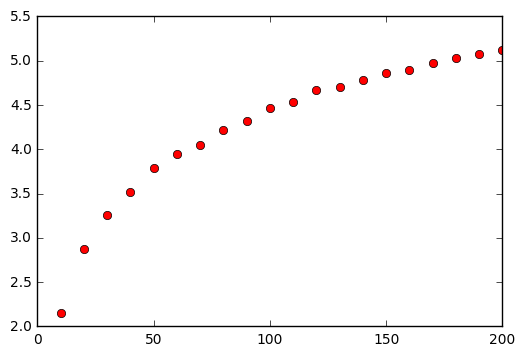

In [115]:
import matplotlib.pyplot as plt

X, Y, var = apartado5(1000)
plt.plot(X, Y, 'ro')
plt.show()

#### Ejercicio 6

Estudiamos  un modelo llamado "perros y pulgas", o también de las "urnas de Ehrenfest".  Este modelo es de gran interés en la Física de sistemas con un gran número de partículas (mecánica estadística). 

Suponemos dos perros $A$ y $B$ tales que en el instante $t=0$ $A$ tiene $n$ pulgas (numeradas de $0$ a $n-1$) y $B$ ninguna.  Los perros están durmiendo uno al lado del otro y las pulgas pueden saltar de uno a otro sin problema. La regla de evolución del sistema es la siguiente: Si en el instante $t$, $L_A(t)$  y $L_B(t)$ son las listas de pulgas en $A$ y $B$, elegimos un entero aleatorio en el intervalo cerrado  $[0,n-1]$ y la pulga que lleva ese número salta cambiando de perro. Así obtenemos las nuevas listas $L_A(t+1)$  y $L_B(t+1)$ que determinan el estado del sistema en el instante $t+1$ (el tiempo es, como en otros ejemplos que hemos considerado,  discreto $t=0,1,2,3,\dots$).  

A) En primer lugar programa una función $siguiente(n,L_A,L_B)$ que reciba el estado del sistema en un instante  y devuelva el estado en el siguiente. 

B) Realiza un gráfico que represente, comenzando con $1000$ pulgas en $A$,  la evolución temporal del número de pulgas en $B$.  Debe observarse claramente la estabilización del número de pulgas, y, a partir de ese momento, oscilaciones pequeñas.

C) Cambia la función del apartado $A$ por otra,  $siguiente1(n,n_B)$,  que únicamente tenga en cuenta el número de pulgas en el perro $B$, ya que todas las demás están en el perro $A$. A fin de cuentas, ¿qué nos importa cómo se llama la pulga que ha saltado al pasar del instante $t$ al $t+1$? Nos debe bastar con saber cuántas pulgas hay en cada perro, y el comportamiento del sistema debe ser el mismo que con  la versión en el apartado A).  Repite el gráfico del apartado B) y comprueba que se obtiene, esencialmente, el mismo.

D) Estudia ahora la siguiente variante del modelo: para pasar del estado $t$ al $t+1$:

1) Elegimos aleatoriamente uno de los dos perros. 

2) Cada perro tiene una probabilidad,  $p_A$ o $p_B$ que no cambia, de que una pulga salte al otro.

3) Cuando un perro ha sido elegido en el sorteo realizado en 1) y tiene pulgas, una pulga salta al otro perro con probabilidad  $p_A$, si se trata del perro $A$, o $p_B$ si el elegido es $B$.

¿Se estabiliza el número de pulgas en cada perro? A largo plazo, ¿qué se obtiene para el número de pulgas en $B$? La respuesta dependerá de los valores de $p_A$ y $p_B$ utilizados, y para responder se pueden realizar gráficos con diferentes valores de las probablidades.


In [9]:
# Apartado A
def siguiente(n, La, Lb):
    x = aleatorioEntero(0, n)
    if x in La:
        La.remove(x)
        Lb.append(x)
    elif x in Lb:
        Lb.remove(x)
        La.append(x)
    else:
        printf("Error!")
        return
    return La, Lb

In [10]:
# comprobando el funcionamiento de la función
La = [0, 1, 2, 3, 4, 5, 6, 7]
Lb = []
La, Lb = siguiente(8, La, Lb)
print La
print Lb

[0, 1, 2, 3, 5, 6, 7]
[4]


In [18]:
#Apartado B
def evolucionTemporalB(n, nT): # n = numero pulgas iniciales A , nT = numero de tiempos transcurridos
    La = []
    for i in xsrange(n): #preparamos lista de A
        La.append(i)
    Lb = [] #preparamos lista B
    T = [0] #preparamos lista de evolucion temporal
    
    for j in xsrange(nT):
        La, Lb = siguiente(n, La, Lb)
        T.append(len(Lb))
    
    return T 

In [22]:
# comprobando el funcionamiento de la función
Tcheck = evolucionTemporalB(10, 20)
Tcheck

[0, 1, 2, 1, 2, 3, 2, 3, 4, 5, 4, 5, 4, 5, 6, 5, 6, 7, 6, 5, 6]

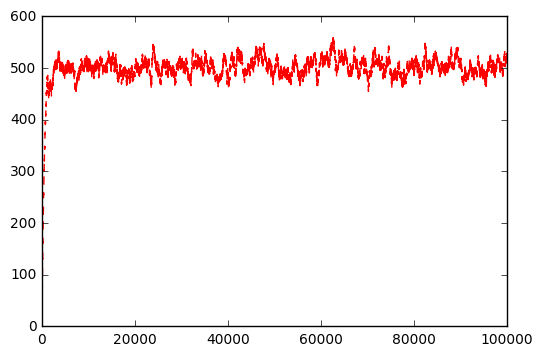

In [35]:
import matplotlib.pyplot as plt

L1 = evolucionTemporalB(1000, 10**5)

X = []
for i in xsrange(0, 10**5+1):
    X.append(i)

plt.plot(X, L1, 'r--')
plt.show()

Podemos ver que se estabiliza sobre 500 pulgas, estos es debido a que si en un perro hay más pulgas que en otro, hay más posibilidades de que una de sus pulgas le toque saltar. Como hemos puesto $1000$ pulgas, después de un tiempo suficientemente grande, se estabiliza en $1000/2 = 500$ 

In [39]:
#apartado C
def siguiente1(n, nb):
    x = aleatorioEntero(0, n)
    if x >= nb:
        nb += 1
    else:
        nb -= 1
    return nb

In [42]:
def evolucionTemporalB1(n, nT):
    T = [0]
    for i in xsrange(nT):
        T.append(siguiente1(n, T[i]))
    return T

In [43]:
#comprobando funciones
L2 = evolucionTemporalB1(10, 20)
L2

[0, 1, 2, 1, 2, 3, 2, 3, 4, 5, 4, 5, 6, 5, 4, 3, 2, 3, 4, 3, 4]

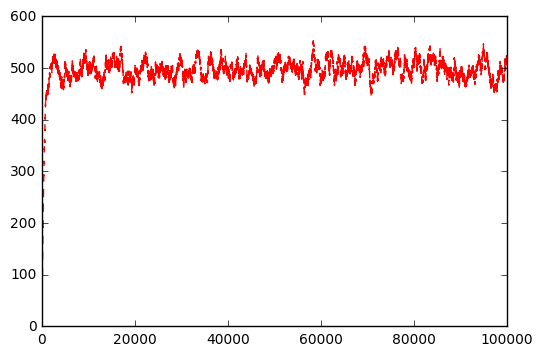

In [44]:
import matplotlib.pyplot as plt

L3 = evolucionTemporalB1(1000, 10**5)

X = []
for i in xsrange(0, 10**5+1):
    X.append(i)

plt.plot(X, L3, 'r--')
plt.show()

Como decía el enunciado, obtenemos el mismo resultado

In [59]:
#Apartado D
def siguienteP(n, nb, pa, pb):
    # n = numero de pulgas totales
    # nb = numero de pulgas en b
    # pa = probabilidad de que una pulga en A salte
    # pb = probabilidad de que una pulga en B salte
    perro = moneda()
    if perro == 0: # perro A
        salta = moneda_trucada(pa)
        if salta==0 and nb != n: # si es cero, salta
            nb += 1
    elif perro == 1: # perro B
        salta = moneda_trucada(pb)
        if salta==0 and nb!=0:
            nb -= 1
    return nb

In [60]:
def evolucionTemporalB_Prob(n, nT, pa, pb):
    # n = numero de pulgas totales
    # nT = numero de tiempos
    # pa = probabilidad de que una pulga en A salte
    # pb = probabilidad de que una pulga en B salte
    T = [0]
    for i in xsrange(nT):
        T.append(siguienteP(n, T[i], pa, pb))
    return T

In [61]:
#comprobando funcionamiento funciones
Laux1 = evolucionTemporalB_Prob(10, 20, 0.5, 0.5)
print Laux1
Laux2 = evolucionTemporalB_Prob(10, 50, 0.1, 0)
print Laux2

[0, 1, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


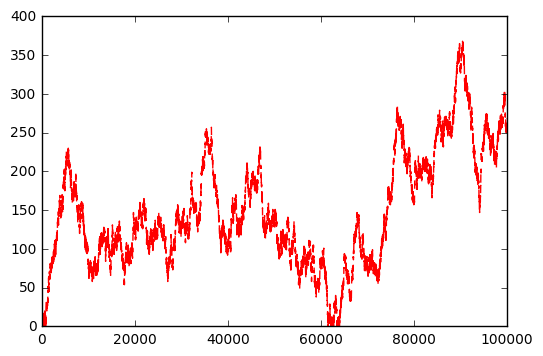

In [65]:
T1 = evolucionTemporalB_Prob(1000, 10**5, 1, 1) #siempre saltan 

X = []
for i in xsrange(0, 10**5+1):
    X.append(i)

plt.plot(X, T1, 'r--')
plt.show()

<b>Gráfico 1: Probabilidades = 1</b>
Antes escogíamos un perro en función de su número de pulgas (cuantas más pulgas, más posibilidades de escoger perro), pero ahora cada perro tiene un $50\%$ de posibilidades, independientemente de su número de pulgas, de ahí que no se aprecie ninguna convergencia en $100000$ iteraciones, varía bastante.

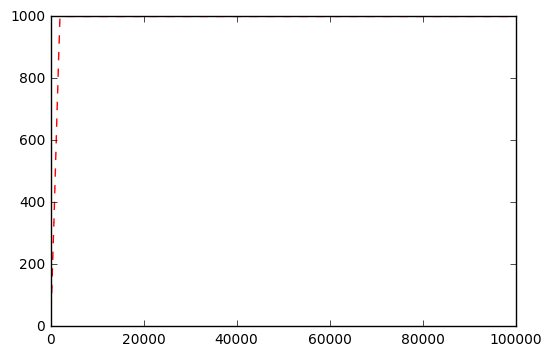

In [63]:
T2 = evolucionTemporalB_Prob(1000, 10**5, 1, 0) #siempre saltan en A, nunca en B

X = []
for i in xsrange(0, 10**5+1):
    X.append(i)

plt.plot(X, T2, 'r--')
plt.show()

<b>Gráfico 2: Probabilidades := para A=$100\%$ y para B=$0\%$</b>
Es un gráfico trivial, como las pulgas de A tienen un $100\%$ de probabilidad de saltar, cuando le toque al perro A, una de sus pulgas saltará. No obstante, como las de B tienen un $0\%$, al cabo de un número considerablemente pequeño, todas las pulgas acabarán estando en B. No es díficil ver que si intercambiamos las posibilidades, el perro B siempre tendrá cero y A todas.

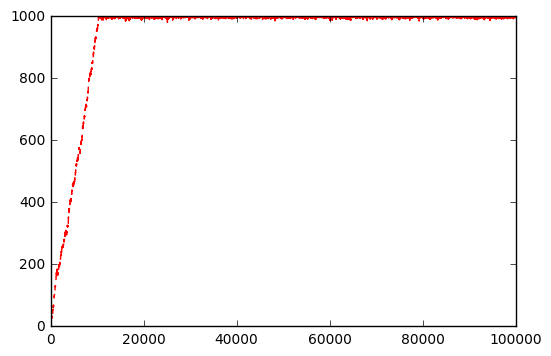

In [64]:
T3 = evolucionTemporalB_Prob(1000, 10**5, 0.6, 0.4) #siempre saltan en A, nunca en B

X = []
for i in xsrange(0, 10**5+1):
    X.append(i)

plt.plot(X, T3, 'r--')
plt.show()

<b>Gráfico 3: Probabilidades := para A=$60\%$ y para B=$40\%$</b>
Este gráfico nos aporta mucha información. Podemos resumirlo en que si escogemos una probabilidad superior a la otra, al cabo de las suficientes iteraciones, las pulgas se estancarán en el perro con las pulgas con <b>menor</b> probabilidad de salto. Podemos demostrar esto de una forma muy simple: escogiendo una probabilidad mayor para las pulgas de B que para las de A y viendo que el perro B no adquiere nunca una gran cantidad de pulgas.

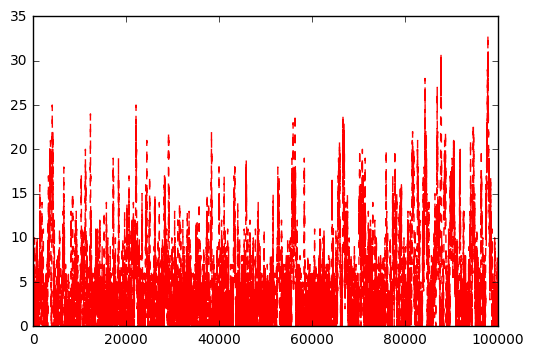

In [69]:
T4 = evolucionTemporalB_Prob(1000, 10**5, 0.45, 0.55) #siempre saltan en A, nunca en B

X = []
for i in xsrange(0, 10**5+1):
    X.append(i)

plt.plot(X, T4, 'r--')
plt.show()

<b>Gráfico 4: Probabilidades := para A=$45\%$ y para B=$55\%$</b>
Como hemos dicho, las pulgas de B después de 100000 iteraciones apenas han superado las 30 (y eso que hay 1000), con solo un 45-55 % en las probabilidades.

#### Ejercicio 7

Supongamos una baraja de cartas inicialmente ordenada. Conocemos, con absoluta certeza, dónde está cada carta de la baraja. Cuando empezamos a barajar la incertidumbre va aumentando, y queremos estudiar este proceso de "aumento de incertidumbre".  Representamos el estado inicial de la baraja de $n$ cartas mediante la lista $srange(n)$, y cualquier estado mediante una reordenación de esta lista.

A) Define una función $barajar(L)$ que reciba una lista, que representa un estado de la baraja, y devuelva la lista $L$ barajada una única vez de acuerdo al siguiente algoritmo:
    
    1) Producimos, aleatoriamente con igual probabilidad de cero o uno,  una lista $LA$  de ceros y unos de longitud $n$. Sea $k$ el número de ceros que hemos obtenido.
    
    2) Llamemos $L1$ a la sublista de $L$ formada por los primeros $k$ elementos de $L$ y $L2$ al resto de $L$.
    
    3) Sea $L3$, inicialmente una lista vacía, la lista en la que vamos a guardar la reordenación de la lista $L$. Recorremos la lista $LA$ y cada vez que encontramos un cero pasamos el primer elemento de la lista $L1$ a $L3$, y cada vez que encontramos un $1$ pasamos el primer elemento de $L2$ a $L3$.
    
    4) Al terminar devolvemos $L3$. Se llama a esta forma de barajar *riffle shuffle*.

B) ¿Qué es un estado del sistema en este caso? Podríamos decir que es una permutación de la lista $srange(n)$, pero en nuestra situación de incertidumbre acerca de la ordenación obtenida después de barajar es mejor decir que *un estado del sistema es una distribución de probabilidad sobre el conjunto de las $n!$ reordenaciones de la lista*, y, más concretamente, *una lista de $n!$ reales positivos $p_i$ tales que su suma total es $1$*. 

En el estado inicial de la baraja podemos suponer que el estado es $[1,0,0,\dots,0,0]$, y cualquier estado sobre el que no hay incertidumbre tendría un $1$ en algún lugar y el resto serían ceros. En cambio, si barajamos, una o varias veces, y no miramos la ordenación obtenida el estado es una distribución de probabilidad que nos dice cómo de probable es cada reordenación.
 
 C) ¿Cómo se mide la cantidad de información? Claude Shannon, creador en 1948 de la teoría de la información, llegó a una solución que ya era conocida en física con el nombre de *entropía*. Concretamente, si $L$ es una lista que representa una distribución de probablidad sobre $N$ objetos, definió su cantidad promedio de información en bits $I(L)$ en la forma
 $$I(L)=-\sum_{p_i\in L}p_ilog_2(p_i),$$
 de forma que un estado seguro (sin incertidumbre alguna)  tiene una cantidad de información nula.
 
 D) Como $n!$ crece bestialmente con $n$, no es posible realizar el experimento que propongo con una baraja real de $52$ cartas. Tomamos entonces $n=7$, y se trata de averiguar, mediante un experimento adecuadamente planeado,    cuántas veces debemos barajar hasta que  el contenido de información del estado  resultante (la incertidumbre) es  máximo. En ese momento podremos decir que *``la baraja ha sido bien barajada''*.


In [3]:
# Apartado A
def barajar(L):
    LA =  []
    k = 0
    for i in xsrange(len(L)):
        x = moneda()
        if x==0:
            k+=1
        LA.append(x)
    L1 = L[:k] #primeros k elementos
    L2 = L[k:] #ultimos k elementos 
    
    L3 = []
    for elem in LA:
        if elem == 0:
            a = L1.pop(0)
            L3.append(a)
        elif elem == 1:
            a = L2.pop(0)
            L3.append(a)
        else:
            print("Error!")
            return
    return L3

In [96]:
CHECK = [1, 2, 3, 4 , 5, 6, 7, 8, 9, 10]
barajar(CHECK)

[7, 1, 8, 2, 3, 4, 5, 9, 10, 6]

No se si he sido yo, pero he leido el enunciado unas cuantas veces y sigo sin entender como calcular la incertidumbre dada una reordenación de L. Esto me impide continuar con el ejercicio.

Suponiendo que lo supiese, podríamos barajar la lista de longitud 7 unas cuantas veces (del orden de 1000 o 10000 veces) y mirar cuando la incertidumbre es máxima en todas esas reordenaciones, es decir, obtener el número de embarajamientos que se han realizado hasta ese momento. Si repetimos este procedimiento unas cuantas veces y calculamos la media del número de embarajamientos, podremos obtener cuanto debemos embarajar una lista de tamaño 7 para considerar que está bien embarajada. Adicionalmente podríamos calcular la desviación típica para saber si es una buena estimación, o por el contrario, la media no nos sería de mucha utilidad.

#### Ejercicio 8

Hemos visto que es posible estimar el área de un disco unidad *lanzando dardos al cuadrado unidad y contando los que caen dentro del disco*. El mismo procedimiento permite, en principio,  estimar el volumen de la hiperesfera $\mathbb{B}_n$  de radio $1$ en $\mathbb{R}^n$ (i.e. el conjunto de puntos de coordenadas $(x_1,x_2,\dots,x_n)\in \mathbb{R}^n$ tales que $x_1^2+x_2^2+\dots+x_n^2\le 1$), pero los volúmenes que vamos obteniendo al incrementar $n$ son cada vez más pequeños y bastante pronto obtenemos cero como respuesta. 

Ésto se debe a que, cuando $n$ es grande, muy pocos dardos caen dentro de la hiperesfera debido a que ocupa muy poco volumen con respecto al volumen, $2^n$,  del hipercubo unidad $[-1,1]^n$. En este ejercicio vemos una manera distinta de *lanzar dardos*, que nos va a asegurar que suficientes caen dentro de la hiperesfera. Denotemos por $V(n)$ el volumen de $\mathbb{B}_n$, que es lo que  queremos calcular. 

#### Descripción del método

1) El *truco básico* consiste en considerar la hiperesfera de dimensión $n$  dentro del hipercilindro $\mathbb{C}_n:=\mathbb{B}_{n-1}\times [-1,1]$, en lugar de dentro del hipercubo $[-1,1]^n$.  El volumen del hipercilindro es, gracias al teorema de Fubini del cálculo integral, igual al volumen de $\mathbb{B}_{n-1}$ multiplicado por dos. 

2) En segundo lugar  observamos que para  obtener puntos aleatorios en el hipercilindro $\mathbb{C}_n$ basta generar puntos aleatorios $(x_1,x_2,\dots,x_{n-1})\in \mathbb{B}_{n-1}$ en la hiperesfera de dimensión $n-1$ y para cada uno producir un real aleatorio $x_n$ en el intervalo $[-1,1]$. 

3) Para que esto funcione debemos encontrar una **manera eficiente** de generar puntos aleatorios en la hiperesfera $\mathbb{B}_{n-1}$,  y el método que vamos a usar se llama de  *cadena de Markov* (una especie de *paseo aleatorio generalizado*):

A) El primer punto de la cadena $\mathbf{x}_0$ es, por ejemplo,  el origen de coordenadas.
    
B) Para cada punto $\mathbf{x}_t=(x_1,x_2,\dots,x_{n-1})\in \mathbb{B}_{n-1}$  obtenemos un nuevo punto $\mathbf{x}_{t+1}$ eligiendo una coordenada al azar, supongamos que hemos obtenido $x_i$,  y un real aleatorio $\Delta$ en el  intervalo $[-\delta,\delta]$. Entonces, cambiamos $x_i$ por $x_i+\Delta$ en $\mathbf{x}$ y si todavía estamos dentro de la hiperesfera ese es el nuevo punto $\mathbf{x}_{t+1}$ en la cadena. Si al hacer el cambio nos vamos fuera de la hiperesfera dejamos $\mathbf{x}_{t+1}:=\mathbf{x}_{t}$. 

C) La cadena $\{\mathbf{x}_0,\mathbf{x}_1,\dots,\mathbf{x}_t,\dots,\mathbf{x}_N\}$ es entonces un conjunto de $N+1$ puntos, todos en la hiperesfera $\mathbb{B}_{n-1}$, y se puede demostrar que, para $N$ suficientemente grande,  están uniformemente distribuidos en la hiperesfera. 

4) Después de estos preparativos podemos ya plantear el cálculo del volumen  $V(n)$ de la hiperesfera $\mathbb{B}_n$: 

Generamos un número muy grande $N$ de puntos en la hiperesfera de dimensión $n-1$, usando el apartado 3),  y para cada uno de ellos vamos calculando un punto en el hipercilindro, como en el apartado 2). Si el punto obtenido en el hipercilindro cae dentro de la hiperesfera  de dimensión $n$, $\mathbb{B}_n$,  incrementamos un contador, al que por ejemplo hemos llamado *dentro*. 

La fracción $dentro/N$, calculada después de haber generado $N$ puntos del hipercilindro,   es aproximadamente igual al cociente de volúmenes $V(n)/(2V(n-1))$ (volumen de la hiperesfera dividido por volumen del hipercilindro). 

Entonces, podemos reducir el cálculo  de $V(n)$ al de $V(n-1)$, el de $V(n-1)$ al de $V(n-2)$, etc., hasta llegar al volumen de la hiperesfera en dimensión $1$ que es igual a dos. 



#### Ejercicios

2.1) Define las funciones necesarias para implementar esta forma, *Monte Carlo con cadenas de Markov*,  de calcular $V(n).$

2.2) El volumen exacto de una hiperesfera se puede calcular mediante integrales, y se obtiene una fórmula que se indica en la celda siguiente:


In [50]:
def Vol_exacto(dim):
    return (pi**(dim/2.0)/gamma(dim/2.0+1.0)).n()

In [5]:
def comprobarPuntoBolaR1(L):
    suma=0
    for i in xsrange(len(L)):
        suma += (L[i]**2)
    if suma <= 1:
        return True
    return False

In [10]:
Lcheck1 = [1, 1]
print comprobarPuntoBolaR1(Lcheck1)
t = random()
Lcheck2 = [cos(2*pi.n()*t), sin(2*pi.n()*t)]
print comprobarPuntoBolaR1(Lcheck2)

False
True


In [44]:
def generarPuntosBola(n_pts_bola, dim, delta):
    T = []
    L1 = []
    for i in xsrange(dim):
        L1.append(0)
    T.append(L1)
    
    cont=1
    L = L1
    while(cont < n_pts_bola):
        while(1):
            a = randint(0, len(L)-1)
            b = aleatorio(-delta, delta)
            L2 = []
            for j in xsrange(0,a):
                L2.append(L[j])
            L2.append(L[a]+b)
            for k in xsrange(a+1, len(L)):
                L2.append(L[k])
            if(comprobarPuntoBolaR1(L2)):
                break
        T.append(L2)
        cont += 1
        L = L2
    return T

In [45]:
aux = generarPuntosBola(10, 5, 0.5)
print aux

[[0, 0, 0, 0, 0], [0, 0, 0, -0.405761969621736, 0], [0, 0, 0, -0.405761969621736, -0.377478149201279], [-0.00494472243234334, 0, 0, -0.405761969621736, -0.377478149201279], [0.447431173952421, 0, 0, -0.405761969621736, -0.377478149201279], [0.447431173952421, 0, -0.312237034526441, -0.405761969621736, -0.377478149201279], [0.122704293087577, 0, -0.312237034526441, -0.405761969621736, -0.377478149201279], [0.122704293087577, -0.409588100727786, -0.312237034526441, -0.405761969621736, -0.377478149201279], [0.282617040066386, -0.409588100727786, -0.312237034526441, -0.405761969621736, -0.377478149201279], [0.282617040066386, -0.409588100727786, -0.312237034526441, -0.675056805426911, -0.377478149201279]]


In [46]:
def generarPuntosHipercilindro(L):
    for i in xsrange(len(L)):
        a = aleatorio(-1, 1)
        L[i].append(a)
    return L

In [47]:
aux2 = generarPuntosHipercilindro(aux)
print aux2

[[0, 0, 0, 0, 0, 0.7346808430066332], [0, 0, 0, -0.405761969621736, 0, -0.9574221546099402], [0, 0, 0, -0.405761969621736, -0.377478149201279, -0.5721698686148355], [-0.00494472243234334, 0, 0, -0.405761969621736, -0.377478149201279, -0.8720504441805608], [0.447431173952421, 0, 0, -0.405761969621736, -0.377478149201279, 0.9889232055570731], [0.447431173952421, 0, -0.312237034526441, -0.405761969621736, -0.377478149201279, 0.6113403197836504], [0.122704293087577, 0, -0.312237034526441, -0.405761969621736, -0.377478149201279, 0.9159284590397703], [0.122704293087577, -0.409588100727786, -0.312237034526441, -0.405761969621736, -0.377478149201279, -0.640726121724577], [0.282617040066386, -0.409588100727786, -0.312237034526441, -0.405761969621736, -0.377478149201279, -0.36422125158569796], [0.282617040066386, -0.409588100727786, -0.312237034526441, -0.675056805426911, -0.377478149201279, -0.8818183007753917]]


In [54]:
def montecarloBola(dim, N, delta):
    L = generarPuntosHipercilindro(generarPuntosBola(N, dim-1, delta))
    dentro = 0
    for i in xsrange(len(L)):
        if(comprobarPuntoBolaR1(L[i])):
            dentro += 1
    return (dentro/N).n(digits=5)

In [55]:
montecarloBola(6, 10**5, 0.1)

0.50609

Como $$\frac{dentro}{N} = \frac{V(n)}{2V(n-1)}$$ podemos despejar $V(n)$ y obtener: $$V(n) = \frac{2dentro}{N} V(n-1)$$ que si desplegamos recursivamente esta expresión acabamos en: $$ V(n) = \frac{2dentro}{N} * \frac{2dentro'}{N} * \frac{2dentro''}{N} * ... * \frac{2dentro''...'}{N} * 2 $$. Que es lo que utilizaremos para calcular el volumen:

In [60]:
def calcularVolumen(dim, N, delta):
    prod = 1
    for i in xsrange(2, dim+1):
        prod *= 2*montecarloBola(i, N, delta)
    return 2*prod

In [59]:
Vol_exacto(5)

5.26378901391432

In [62]:
%time calcularVolumen(5, 10**5, 0.1)

CPU times: user 1min 13s, sys: 1.1 s, total: 1min 14s
Wall time: 1min 13s


5.7985

No esta mal para $N=10000$. Si tuviésemos más recursos podríamos aumentar N y conseguir más precisión.

#### Ejercicio 9

<p>Supongamos que para cubrir un puesto de trabajo hay $n$ candidatos que deben <br />ser entrevistados para decidir cu&aacute;l de ellos obtendr&aacute; el puesto. Las <br />condiciones del problema son las siguientes:</p>
<ol>
<li>El n&uacute;mero $n$ de candidatos es conocido al comenzar el proceso de selecci&oacute;n.</li>
<li>Si entrevist&aacute;ramos a todos los candidatos los podr&iacute;amos ordenar de mejor a peor sin empates.&nbsp;</li>
<li>Los candidatos son entrevistados de uno en uno y en orden aleatorio, con cada una de las $n!$ posibles ordenaciones elegida con probabilidad $1/n!.$</li>
<li>
<p>Despu&eacute;s de cada entrevista el candidato es aceptado o rechazado, y esta decisi&oacute;n es irrevocable.</p>
</li>
<li>
<p>La estrategia que utilizamos consiste en entrevistar a un cierto n&uacute;mero $r<n$ de candidatos y elegir al siguiente entrevistado que es mejor que los $r$ primeros. Si no existe elegimos al &uacute;ltimo aunque no ser&aacute; el mejor. &nbsp;Se puede demostrar que esta estrategia es &oacute;ptima.&nbsp;</p>
</li>
</ol>
<p><span style="color: #ff0000;">Define una funci&oacute;n $probabilidad(n,N)$</span> que nos devuelva el valor de $r$ que hace m&aacute;xima la probabilidad de elegir al mejor candidato cuando hay $n$ candidatos y la probabilidad m&aacute;xima obtenida. El segundo par&aacute;metro $N$ es el el n&uacute;mero de vueltas del bucle que usamos para calcular (experimentalmente) las probabilidades, &nbsp;y debe ser suficientemente grande para que las probabilidades tengan, al menos, un par de decimales "correctos" y no tan grande que el programa tarde demasiado. Cuando $n$ tiende a infinito, <span style="color: #ff0000;">&iquest;qu&eacute; l&iacute;mite parece tener la probabilidad m&aacute;xima?&nbsp;</span></p>
<p>Representamos cada repetici&oacute;n del experimento "se presentan $n$ candidatos en orden aleatorio" como una permutaci&oacute;n aleatoria de los enteros $1,2,3,\dots,n$ y suponemos que $n$ es el mejor y $1$ el peor.&nbsp;</p>

In [3]:
def perm(L):
    tam = len(L)
    p = []
    for i in xsrange(tam):
        x = randint(0, len(L)-1)
        a = L.pop(x)
        p.append(a)
    return p

In [17]:
L = [1, 2, 3, 4, 5, 6, 7]
print perm(L)

[2, 6, 3, 4, 5, 1, 7]


In [4]:
def probabilidad9(n, N):
    probs = []
    for r in xsrange(n):
        cont = 0 #contamos las veces que obtenemos el mejor candidato (id = n)
        for j in xsrange(N): #repetimos un gran número de veces para calcular cada probabilidad (en funcion de r)
            L = []
            for i in xsrange(1, n+1): #preparamos lista de candidatos
                L.append(i)
            L = perm(L) #obtenemos una permutacion aleatoria
            NO = L[:r] #candidatos rechazados
            SI = L[r:] #posibles candidatos aceptados
            for k in xsrange(len(SI)): #comparamos cada posible buen candidato con los rechazados.
                flag = 0
                for l in xsrange(len(NO)):
                    if NO[l] > SI[k]: # si el posible buen candidato es peor que alguno de los rechazados,
                        flag = 1    # pasamos al siguiente.
                        break
                if flag == 0: 
                    if SI[k]==n: #cuando encontremos un candidato mejor que todos los rechazados, miramos si es el mejor de todos
                        cont += 1
                    break
                    
        pr = (cont/N).n()
        probs.append(pr)
    return probs.index(max(probs)), max(probs) #devolvemos r y su probabilidad
        

In [6]:
%time probabilidad9(10, 10**5)

CPU times: user 3min 42s, sys: 3.18 s, total: 3min 45s
Wall time: 3min 42s


(3, 0.399140000000000)

In [7]:
for cand in xsrange(6, 11):
    for rep in [5000, 10000, 15000]:
        print "Candidatos = "+str(cand)+"; Repeticiones = "+str(rep)+"; Resultado => "+str(probabilidad9(cand, rep))

Candidatos = 6; Repeticiones = 5000; Resultado => (2, 0.426800000000000)
Candidatos = 6; Repeticiones = 10000; Resultado => (2, 0.430000000000000)
Candidatos = 6; Repeticiones = 15000; Resultado => (2, 0.429466666666667)
Candidatos = 7; Repeticiones = 5000; Resultado => (2, 0.419000000000000)
Candidatos = 7; Repeticiones = 10000; Resultado => (2, 0.410600000000000)
Candidatos = 7; Repeticiones = 15000; Resultado => (2, 0.414733333333333)
Candidatos = 8; Repeticiones = 5000; Resultado => (3, 0.404600000000000)
Candidatos = 8; Repeticiones = 10000; Resultado => (2, 0.410300000000000)
Candidatos = 8; Repeticiones = 15000; Resultado => (3, 0.404933333333333)
Candidatos = 9; Repeticiones = 5000; Resultado => (3, 0.416000000000000)
Candidatos = 9; Repeticiones = 10000; Resultado => (3, 0.394500000000000)
Candidatos = 9; Repeticiones = 15000; Resultado => (3, 0.405133333333333)
Candidatos = 10; Repeticiones = 5000; Resultado => (4, 0.404000000000000)
Candidatos = 10; Repeticiones = 10000; Res

No podemos hacer muchas comprobaciones porque la máquina que disponemos es limitada y la función que hemos programado tiene una complejidad de $O(n^3*N)$. No obstante, podemos ver que el valor de $r$ que maximiza la probabilidad se encuentra cerca de $\frac{1}{3}n$ aproximadamente, y esa probabilidad máxima está sobre el $40\%$.

#### Ejercicio 10

Consideramos un tablero infinito (en la pr&aacute;ctica ser&aacute; muy grande porque infinito no lo podemos hacer en el ordenador) bidimensional que representamos mediante los puntos de coordenadas enteras del cuadrado $T_N:=[0,2N]\times[0,2N]\subset \mathbb{R}^2$ . El estado del tablero es entonces una matriz cuadrada de ceros y unos cuyos &iacute;ndices van de $0$ a $2N$. En el instante $t=0$ &nbsp;la &uacute;nica casilla negra es la central correspondiente al punto $(N,N)$. En cada instante de tiempo $t$ llamamos $X_t$ al conjunto de todas las casillas negras en ese instante y $V_t$ al conjunto de todas las casillas blancas que comparten un lado con una casilla negra. &nbsp;Obtenemos $X_{t+1}$ eligiendo al azar una casilla de $V_t$ y cambiando su color a negro.&nbsp;</p>
<p>Nos interesa estudiar el aspecto de $X_t$ para $t$ muy grande (por ejemplo, $t=10^5,10^6$). &nbsp;<span style="color: #ff0000;">Define una funci&oacute;n $tablero(t,N)$</span>&nbsp;(teniendo <span style="color: #ff0000;">cuidado</span> de no saturar la RAM) que devuelva un estado&nbsp;$X_t$ del tablero obtenido mediante las reglas indicadas. <span style="color: #ff0000;">Representa gr&aacute;ficamente</span> el tablero devuelto por la funci&oacute;n. El tama&ntilde;o del tablero debe ser suficientemente grande para que quede una zona totalmente blanca cerca del borde del tablero. <span style="color: #ff0000;">Compara las gr&aacute;ficas</span> para $t=100,200,300,1000$ con las que se obtienen para $t$ muy grande, &iquest;qu&eacute; observas?</p>

In [25]:
# Esta funcion comprueba, dado una casilla del tablero, si esta pertenece al conjunto Vt.
# recordar que 1 representa una casilla negra y el 0 una blanca.
def perteneceVt(M, row, col, tam):
    if M[row, col]==1:
        return False
    else:
        for i in xsrange(-1, 2):
            for j in xsrange(-1, 2):
                auxR = row+i
                if auxR<0:
                    auxR = 0
                elif auxR>=tam:
                    auxR = tam-1
                auxC = col+j
                if auxC<0:
                    auxC = 0
                elif auxC>=tam:
                    auxC = tam-1
                if M[auxR, auxC]==1:
                    return True
        return False
    

In [27]:
A1 = matrix(10)
A1[4,4] = 1
print perteneceVt(A1, 4, 3, 10)
print perteneceVt(A1, 6, 5, 10)

True
False


In [30]:
def siguienteTablero(M, tam):
    r = randint(0, tam-1)
    c = randint(0, tam-1)
    while(perteneceVt(M, r, c, tam)==False):
        r = randint(0, tam-1)
        c = randint(0, tam-1)
    M[r,c]=1
    return M

In [31]:
A2 = matrix(10)
A2[4,4]=1
siguienteTablero(A2, 10)
A2

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]

In [32]:
def tablero(t, N):
    tam = 2*N
    M = matrix(tam)
    M[N, N] = 1
    
    for i in xsrange(t):
        M = siguienteTablero(M, tam)
    
    return M

In [37]:
Acheck = tablero(10, 5)
Acheck

[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 0 0 0 0]
[1 0 1 0 0 0 0 0 0 0]
[0 0 1 1 1 0 1 0 0 0]
[0 0 0 1 1 1 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]

In [69]:
def grafica(M, N):
    tam = 2*N
    L = []
    for i in xsrange(tam):
        for j in xsrange(tam):
            if M[i, j] == 1:
                L.append((i,j))
    return points(L,pointsize=40).show(aspect_ratio=1)

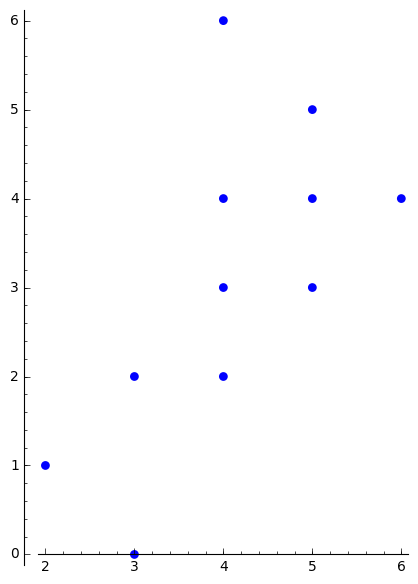

In [70]:
grafica(Acheck, 5)

Después de haber codificado y testeado todas las funciones necesarias para el ejercicio, es trivial ver que si $t$ es superior al número de casillas del tablero, este acabará con todas las casillas negras. Como necesitamos hacer la prueba para $t=100,200,300,1000$ necesitamos un tamaño aproximado de $50 x 50$, es decir, $N = 25$.

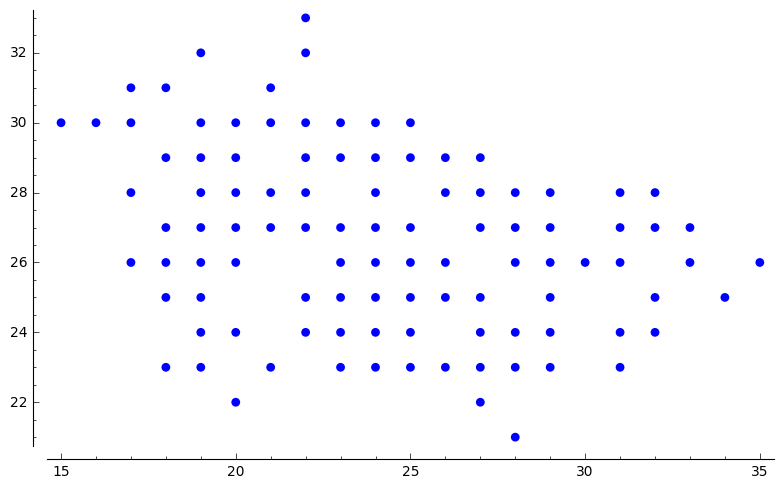

In [71]:
M1 = tablero(100, 25)
grafica(M1, 25)

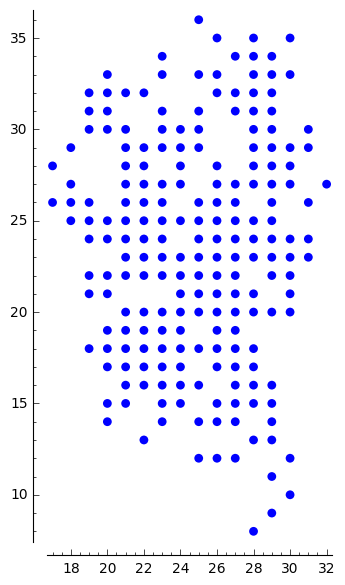

In [72]:
M2 = tablero(200, 25)
grafica(M2, 25)

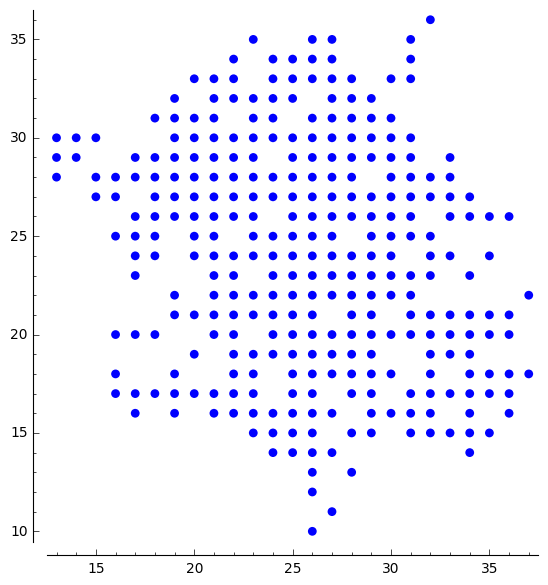

In [73]:
M3 = tablero(300, 25)
grafica(M3, 25)

CPU times: user 1.88 s, sys: 92 ms, total: 1.97 s
Wall time: 1.84 s


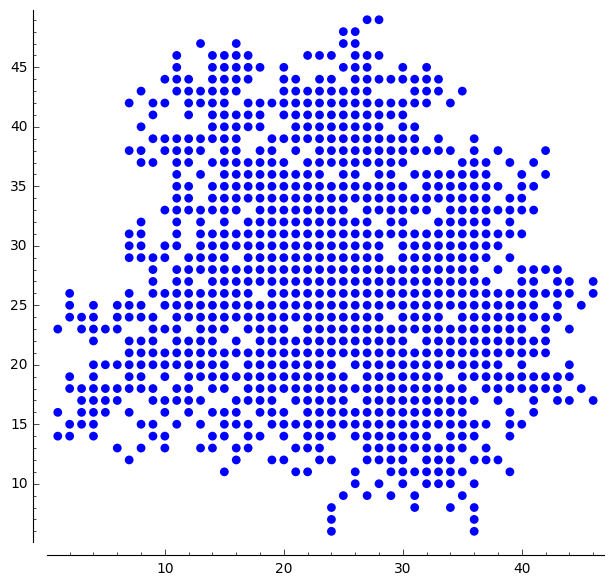

In [75]:
%time M4 = tablero(1000, 25)
grafica(M4, 25)

No llega a los bordes pero la gráfica se autoajusta a los puntos seleccionados (casillas negras). Seguro que existe algún comando/parámetro par arreglar esto pero lo desconozco. Se puede ver que las casillas negras van creciendo como una población que se expande. 